In [1]:
import os
import datetime
import joblib

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
data

RECAP 

 . stack pour les classes d'âge avoir dim 3 
   Mettre les départements en dim 3 
   faire le td tensorflow avec cette convention 
   stacker batch size et département 
   
   (batch_size, time_step, dep, features)
   
   batch_size = 1 
   
   tf.stack 
   
   lambda 

## Importation du x-array

In [2]:
!pwd

/Users/raphaelmenguy/code/projet_wagon/elaine_and_the_gentle_boyz/notebooks


In [7]:
cd ..

/Users/raphaelmenguy/code/projet_wagon/elaine_and_the_gentle_boyz


In [209]:
dataset = joblib.load('training_data/final_dataset.pkl')

In [210]:
dataset

<xarray.Dataset>
Dimensions:                (classe_age: 11, time: 608, zone: 116)
Coordinates:
  * time                   (time) datetime64[ns] 2020-01-01 ... 2021-08-30
  * zone                   (zone) object '01' '02' '03' ... '978' 'fr' 'france'
  * classe_age             (classe_age) int64 0 9 19 29 39 49 59 69 79 89 90
Data variables: (12/85)
    tpauv                  (zone) float64 10.7 18.9 15.5 16.4 ... nan nan nan
    talloc                 (zone) float64 2.3 7.5 6.1 5.0 ... nan nan nan nan
    smok                   (zone) float64 0.262 0.305 0.262 ... nan nan nan
    ALD1                   (zone) float64 814.0 782.0 918.0 ... nan nan nan
    ALD2                   (zone) float64 47.0 45.0 52.0 54.0 ... nan nan nan
    ALD3                   (zone) float64 841.0 1.003e+03 1.09e+03 ... nan nan
    ...                     ...
    nbre_B0                (zone, time) float64 nan nan nan nan ... nan nan nan
    nbre_B1                (zone, time) float64 nan nan nan nan ... nan nan nan
    taux_B1                (zone, time) float64 nan nan nan nan ... nan nan nan
    nbre_C0                (zone, time) float64 nan nan nan nan ... nan nan nan
    nbre_C1                (zone, time) float64 nan nan nan nan ... nan nan nan
    taux_C1                (zone, time) float64 nan nan nan nan ... nan nan nan

In [211]:
df_mutant = pd.read_csv('data/processed_dataframes/presence_mutant.csv')
df_mutant.columns

Index(['zone', 'date', 'nbre_positif', 'taux_crib', 'nbre_A0', 'nbre_A1',
       'taux_A1', 'nbre_B0', 'nbre_B1', 'taux_B1', 'nbre_C0', 'nbre_C1',
       'taux_C1'],
      dtype='object')

In [212]:
to_delete= list(df_mutant.columns[2:]) + ['dc_tot'] + ['nbre_dose_1','nbre_dose_complet','nbre_cum_dose_1',
                                                      'nbre_cum_complet','couverture_dose1','couverture_complete',
                                                      'esms_dc','conf','test_positifs_femmes', 'tests_positifs_hommes',
                                                      'tests_positifs_tot','pop_femme','pop_homme','TX','UX','RR']
to_delete

['nbre_positif',
 'taux_crib',
 'nbre_A0',
 'nbre_A1',
 'taux_A1',
 'nbre_B0',
 'nbre_B1',
 'taux_B1',
 'nbre_C0',
 'nbre_C1',
 'taux_C1',
 'dc_tot',
 'nbre_dose_1',
 'nbre_dose_complet',
 'nbre_cum_dose_1',
 'nbre_cum_complet',
 'couverture_dose1',
 'couverture_complete',
 'esms_dc',
 'conf',
 'test_positifs_femmes',
 'tests_positifs_hommes',
 'tests_positifs_tot',
 'pop_femme',
 'pop_homme',
 'TX',
 'UX',
 'RR']

In [213]:
mdep = [x for x in dataset.zone.values
        if x not in ['france', '971', '972', '973', '974','975','976','978','977','fr','2A','2B']]

In [214]:
data = (dataset
    .sel(zone=mdep, time=slice('2021-01-01','2021-07-28'))
    .drop_vars(names=to_delete)
)

In [215]:
data

<xarray.Dataset>
Dimensions:              (classe_age: 11, time: 209, zone: 104)
Coordinates:
  * time                 (time) datetime64[ns] 2021-01-01 ... 2021-07-28
  * zone                 (zone) object '01' '02' '03' '04' ... '93' '94' '95'
  * classe_age           (classe_age) int64 0 9 19 29 39 49 59 69 79 89 90
Data variables: (12/57)
    tpauv                (zone) float64 10.7 18.9 15.5 16.4 ... 28.6 16.7 16.8
    talloc               (zone) float64 2.3 7.5 6.1 5.0 3.6 ... 3.4 10.6 6.0 5.8
    smok                 (zone) float64 0.262 0.305 0.262 ... 0.213 0.213 0.213
    ALD1                 (zone) float64 814.0 782.0 918.0 ... 814.0 769.0 729.0
    ALD2                 (zone) float64 47.0 45.0 52.0 54.0 ... 41.0 52.0 50.0
    ALD3                 (zone) float64 841.0 1.003e+03 1.09e+03 ... 704.0 743.0
    ...                   ...
    pos_7j               (zone, time) float64 1.007e+03 1.014e+03 ... 2.218e+03
    population           (zone, time) float64 6.57e+05 6.57e+05 ... 1.248e+06
    nbre_tests_positifs  (zone, time) float64 4.0 111.0 29.0 ... 376.0 346.0
    taux_incidence_std   (zone, time) float64 0.6782 17.07 4.743 ... 28.54 26.09
    dc                   (zone, time) float64 751.0 751.0 ... 4.086e+03
    incid_dc             (zone, time) float64 0.0 0.0 1.0 1.0 ... 0.0 1.0 0.0

In [216]:
data = data.fillna(0)

## Ajustement données

Nombre de tests positifs dans le département 75

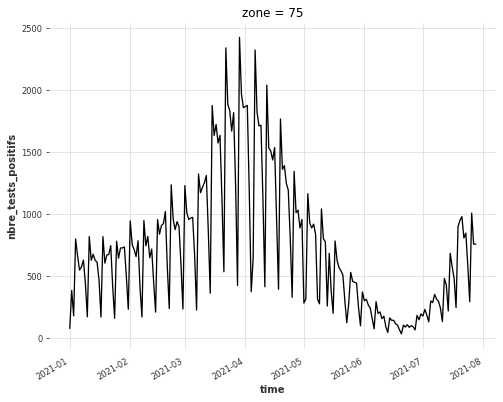

In [217]:
data['nbre_tests_positifs'].sel(zone='75').plot()

Nombre d'hospitalisations dep. 08 et dep. 75

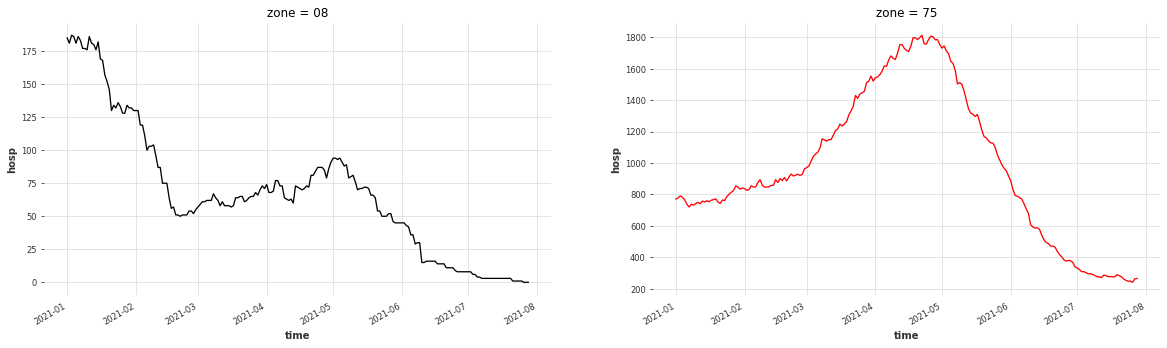

In [218]:
plt.figure(figsize=(20,5))
ax = plt.subplot(1,2,1)
ax = data['hosp'].sel(zone='08').plot(color = 'k')
ax1 = plt.subplot(1,2,2)
ax1 = data['hosp'].sel(zone='75').plot(color = 'r')

### Rapporté à la population

On scale pour 100 000 habitants: feature = 100000*feature/len(zone)

À l'échelle de la France: pos, pos_7

Par département: hosp, rea, rad, dchosp, incid_hosp, incid_rea, incid_rad, incid_dchosp, reg_incid_rea, nbre_tests_positifs, dc, indic_dc 

In [219]:
feat_dep = ['hosp', 'rea', 'rad', 'dchosp', 'incid_hosp',
            'incid_rea', 'incid_rad', 'incid_dchosp', 'reg_incid_rea', 'nbre_tests_positifs', 'dc', 'indic_dc','pos',
           'pos_7j']

In [220]:
##### On rapporte à 100 000 habitants #######

def scale_features(data):
    for feature in feat_dep:
        for zone in data.zone:
            try:
                data[feature].loc[{'zone':zone}] = 100000*data[feature].sel(zone=zone)/(np.array(data['population'].sel(zone=zone))[0])
            except:
                continue
    return data 

In [221]:
propor_data = scale_features(data)

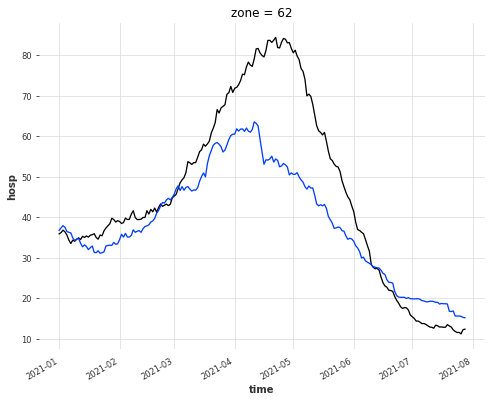

In [222]:
propor_data['hosp'].sel(zone='75').plot()
propor_data['hosp'].sel(zone='62').plot()

In [223]:
dict(data.data_vars).keys()

dict_keys(['tpauv', 'talloc', 'smok', 'ALD1', 'ALD2', 'ALD3', 'ALD5', 'ALD6', 'ALD7', 'ALD8', 'ALD9', 'ALD10', 'ALD11', 'ALD12', 'ALD13', 'ALD14', 'ALD15', 'ALD16', 'ALD17', 'ALD18', 'ALD19', 'ALD20', 'ALD21', 'ALD22', 'ALD23', 'ALD24', 'ALD25', 'ALD26', 'ALD27', 'ALD28', 'ALD29', 'ALD30', 'pm25', 'pm10', 'mobindex1', 'mobindex2', 'tx_pos', 'tx_incid', 'TO', 'R', 'hosp', 'rea', 'rad', 'dchosp', 'reg_rea', 'incid_hosp', 'incid_rea', 'incid_rad', 'incid_dchosp', 'reg_incid_rea', 'pos', 'pos_7j', 'population', 'nbre_tests_positifs', 'taux_incidence_std', 'dc', 'incid_dc'])

### Scaling des données

In [224]:
from sklearn.preprocessing import MinMaxScaler

In [225]:
data['ALD1'].zone

<xarray.DataArray 'zone' (zone: 104)>
array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '1', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77',
       '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '9', '90', '91', '92', '93', '94', '95'], dtype=object)
Coordinates:
  * zone     (zone) object '01' '02' '03' '04' '05' ... '91' '92' '93' '94' '95'

In [226]:
###### On min max chaque feature par rapport dans le contexte zone géographique 

##### faire le scale sur le train pour éviter data leakage 

def scaling(data):
    for feature in dict(data.data_vars).keys():
        for zone in data.zone:
            min_max = MinMaxScaler()
            try:
                data[feature].loc[{'zone':zone}] = min_max.fit_transform(data[feature].sel(zone=zone))
            except:
                continue 
    return data

In [227]:
scaled_data = scaling(data)

In [228]:
scaled_data

<xarray.Dataset>
Dimensions:              (classe_age: 11, time: 209, zone: 104)
Coordinates:
  * time                 (time) datetime64[ns] 2021-01-01 ... 2021-07-28
  * zone                 (zone) object '01' '02' '03' '04' ... '93' '94' '95'
  * classe_age           (classe_age) int64 0 9 19 29 39 49 59 69 79 89 90
Data variables: (12/57)
    tpauv                (zone) float64 10.7 18.9 15.5 16.4 ... 28.6 16.7 16.8
    talloc               (zone) float64 2.3 7.5 6.1 5.0 3.6 ... 3.4 10.6 6.0 5.8
    smok                 (zone) float64 0.262 0.305 0.262 ... 0.213 0.213 0.213
    ALD1                 (zone) float64 814.0 782.0 918.0 ... 814.0 769.0 729.0
    ALD2                 (zone) float64 47.0 45.0 52.0 54.0 ... 41.0 52.0 50.0
    ALD3                 (zone) float64 841.0 1.003e+03 1.09e+03 ... 704.0 743.0
    ...                   ...
    pos_7j               (zone, time) float64 153.3 154.3 155.4 ... 176.9 177.7
    population           (zone, time) float64 6.57e+05 6.57e+05 ... 1.248e+06
    nbre_tests_positifs  (zone, time) float64 0.6089 16.9 4.414 ... 30.12 27.72
    taux_incidence_std   (zone, time) float64 0.6782 17.07 4.743 ... 28.54 26.09
    dc                   (zone, time) float64 114.3 114.3 114.6 ... 327.3 327.3
    incid_dc             (zone, time) float64 0.0 0.0 1.0 1.0 ... 0.0 1.0 0.0

## Fenêtres

Target: hosp

In [229]:
n = len(data['hosp'].sel(zone='75'))

In [230]:
cd elaine_and_the_gentle_boyz

[Errno 2] No such file or directory: 'elaine_and_the_gentle_boyz'
/Users/raphaelmenguy/code/projet_wagon/elaine_and_the_gentle_boyz


In [231]:
from egbz.utils import *

### 1 feature pour tous les départements

In [58]:
ts = from_df(scaled_data['hosp'].to_dataframe().reset_index('zone'), cat_cols='zone')
ts = ts.pd_dataframe()

In [59]:
ts

component,hosp_01,hosp_02,hosp_03,hosp_04,hosp_05,hosp_06,hosp_07,hosp_08,hosp_09,hosp_1,...,hosp_90,hosp_91,hosp_92,hosp_93,hosp_94,hosp_95,hosp_975,hosp_977,hosp_978,hosp_fr
time,,,,,,,,,,,,,,,,,,,,,
2021-01-01,38.511009,56.838704,78.173340,76.877909,96.644939,51.232356,46.806883,69.671714,26.903240,NaN,...,137.714510,38.729696,44.244442,40.774805,39.614777,37.249050,NaN,NaN,NaN,NaN
2021-01-02,38.663227,56.648608,79.380650,75.667234,95.234064,51.695578,48.948375,68.165299,27.559417,NaN,...,139.855150,39.032864,44.554278,41.014305,40.468237,36.928628,NaN,NaN,NaN,NaN
2021-01-03,38.815444,56.268416,80.889788,76.272572,98.761252,52.251444,49.866157,70.424922,27.559417,NaN,...,136.287417,39.260240,44.926080,41.493304,40.966088,37.489366,NaN,NaN,NaN,NaN
2021-01-04,39.424314,56.458512,81.493443,77.483247,102.288439,52.251444,52.313576,70.048318,28.215593,NaN,...,142.709337,40.472912,46.289354,42.032178,39.899263,37.329155,NaN,NaN,NaN,NaN
2021-01-05,38.663227,59.500048,82.700753,79.299261,103.699314,52.529378,53.843212,68.165299,28.871770,NaN,...,139.141603,39.639200,46.351321,40.595180,36.912153,36.367889,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24,11.416307,9.124608,7.243862,30.872231,21.868563,27.885966,11.013384,2.636227,25.590887,NaN,...,27.114774,15.461562,21.750419,21.674713,17.780420,13.617932,NaN,NaN,NaN,NaN
2021-08-25,11.720742,9.124608,7.847517,30.266893,21.868563,27.608033,10.707457,2.636227,27.559417,NaN,...,26.401227,14.703642,22.060254,21.554963,17.424812,14.178670,NaN,NaN,NaN,NaN
2021-08-26,12.025177,8.554320,7.847517,30.266893,21.868563,27.052166,11.319312,2.636227,26.903240,NaN,...,26.401227,14.400474,22.679924,21.435213,17.709299,13.858249,NaN,NaN,NaN,NaN


In [88]:
ts_2 = from_df(scaled_data['dc'].to_dataframe().reset_index('zone'), cat_cols='zone').pd_dataframe()

In [89]:
ts_1 = from_df(scaled_data['rea'].to_dataframe().reset_index('zone'), cat_cols='zone').pd_dataframe()

In [90]:
h = [np.array(ts),np.array(ts_1),np.array(ts_2)]

In [91]:
tf.convert_to_tensor(h)

<tf.Tensor: shape=(3, 240, 110), dtype=float64, numpy=
array([[[ 38.51100913,  56.83870355,  78.17333957, ...,          nan,
                  nan,          nan],
        [ 38.66322655,  56.64860755,  79.38064983, ...,          nan,
                  nan,          nan],
        [ 38.81544398,  56.26841555,  80.88978766, ...,          nan,
                  nan,          nan],
        ...,
        [ 12.02517676,   8.55431993,   7.84751671, ...,          nan,
                  nan,          nan],
        [ 11.41630705,   8.17412793,   7.84751671, ...,          nan,
                  nan,          nan],
        [ 11.1118722 ,   8.36422393,   7.84751671, ...,          nan,
                  nan,          nan]],

       [[  2.28326141,   4.37220797,   4.22558592, ...,          nan,
                  nan,          nan],
        [  2.28326141,   4.37220797,   4.22558592, ...,          nan,
                  nan,          nan],
        [  2.28326141,   4.56230396,   4.52741349, ...,          n

2021-09-01 10:29:05.686519: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(240, 110), dtype=float64, numpy=
array([[38.51100913, 56.83870355, 78.17333957, ...,         nan,
                nan,         nan],
       [38.66322655, 56.64860755, 79.38064983, ...,         nan,
                nan,         nan],
       [38.81544398, 56.26841555, 80.88978766, ...,         nan,
                nan,         nan],
       ...,
       [12.02517676,  8.55431993,  7.84751671, ...,         nan,
                nan,         nan],
       [11.41630705,  8.17412793,  7.84751671, ...,         nan,
                nan,         nan],
       [11.1118722 ,  8.36422393,  7.84751671, ...,         nan,
                nan,         nan]])>

### Toutes les features pour un département

In [42]:
ts_75 = from_df(scaled_data.sel(zone='75').drop_vars('classe_age').to_dataframe()).pd_dataframe()
ts_75

component,zone,tpauv,talloc,smok,ALD1,ALD2,ALD3,ALD5,ALD6,ALD7,...,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,population,nbre_tests_positifs,taux_incidence_std,dc,incid_dc
time,,,,,,,,,,,,,,,,,,,,,
2021-01-01,75.0,15.8,4.5,0.213,663.0,46.0,527.0,1275.0,403.0,714.0,...,0.930981,0.372392,0.884432,3.537729,135.038829,2148271.0,3.537729,3.324196,248.944384,8.0
2021-01-02,75.0,15.8,4.5,0.213,663.0,46.0,527.0,1275.0,403.0,714.0,...,0.558589,0.372392,0.791334,17.781742,133.456161,2148271.0,17.735193,16.475207,249.689169,8.0
2021-01-03,75.0,15.8,4.5,0.213,663.0,46.0,527.0,1275.0,403.0,714.0,...,0.232745,0.093098,0.884432,8.192635,136.900791,2148271.0,8.192635,7.855492,249.875365,2.0
2021-01-04,75.0,15.8,4.5,0.213,663.0,46.0,527.0,1275.0,403.0,714.0,...,0.930981,0.512040,2.606747,37.285799,140.066128,2148271.0,37.099602,33.634701,250.899444,11.0
2021-01-05,75.0,15.8,4.5,0.213,663.0,46.0,527.0,1275.0,403.0,714.0,...,3.118787,0.651687,2.280904,30.908577,144.069347,2148271.0,30.815479,28.574598,252.202818,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24,75.0,15.8,4.5,0.213,663.0,46.0,527.0,1275.0,403.0,714.0,...,0.744785,0.232745,1.396472,23.460727,154.403239,2148271.0,23.088335,21.684360,432.114943,5.0
2021-08-25,75.0,15.8,4.5,0.213,663.0,46.0,527.0,1275.0,403.0,714.0,...,0.651687,0.093098,1.396472,23.786571,152.960218,2148271.0,22.948688,21.303818,432.301139,2.0
2021-08-26,75.0,15.8,4.5,0.213,663.0,46.0,527.0,1275.0,403.0,714.0,...,0.884432,0.093098,1.210276,0.418942,3.491180,2148271.0,21.878059,20.634924,432.487335,2.0


In [69]:
data.zone[1:]

<xarray.DataArray 'zone' (zone: 109)>
array(['02', '03', '04', '05', '06', '07', '08', '09', '1', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '3', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '9', '90', '91', '92', '93', '94', '95', '975', '977',
       '978', 'fr'], dtype=object)
Coordinates:
  * zone     (zone) object '02' '03' '04' '05' '06' ... '975' '977' '978' 'fr'

In [189]:
data

<xarray.Dataset>
Dimensions:              (classe_age: 11, time: 209, zone: 106)
Coordinates:
  * time                 (time) datetime64[ns] 2021-01-01 ... 2021-07-28
  * zone                 (zone) object '01' '02' '03' '04' ... '93' '94' '95'
  * classe_age           (classe_age) int64 0 9 19 29 39 49 59 69 79 89 90
Data variables: (12/57)
    tpauv                (zone) float64 10.7 18.9 15.5 16.4 ... 28.6 16.7 16.8
    talloc               (zone) float64 2.3 7.5 6.1 5.0 3.6 ... 3.4 10.6 6.0 5.8
    smok                 (zone) float64 0.262 0.305 0.262 ... 0.213 0.213 0.213
    ALD1                 (zone) float64 814.0 782.0 918.0 ... 814.0 769.0 729.0
    ALD2                 (zone) float64 47.0 45.0 52.0 54.0 ... 41.0 52.0 50.0
    ALD3                 (zone) float64 841.0 1.003e+03 1.09e+03 ... 704.0 743.0
    ...                   ...
    pos_7j               (zone, time) float64 1.007e+03 1.014e+03 ... 2.218e+03
    population           (zone, time) float64 6.57e+05 6.57e+05 ... 1.248e+06
    nbre_tests_positifs  (zone, time) float64 4.0 111.0 29.0 ... 376.0 346.0
    taux_incidence_std   (zone, time) float64 0.6782 17.07 4.743 ... 28.54 26.09
    dc                   (zone, time) float64 751.0 751.0 ... 4.086e+03
    incid_dc             (zone, time) float64 0.0 0.0 1.0 1.0 ... 0.0 1.0 0.0

In [2]:
tableau = from_df(scaled_data.sel(zone='75').drop_vars('classe_age').to_dataframe()).pd_dataframe()
incidence_hosp = tableau['incid_hosp']
tableau = tableau.drop(columns = ['incid_hosp'])
tableau['incid_hosp'] = incidence_hosp
tableau

NameError: name 'from_df' is not defined

In [1]:
tableau['incid_hosp'].plot()

NameError: name 'tableau' is not defined

In [233]:
#ts_1 = np.array(from_df(scaled_data.sel(zone='01').drop_vars('classe_age').to_dataframe()).pd_dataframe())
#### Il faudra rajouter 2A et 2B et fr 

L = []
for zone in data.zone:
    tableau = from_df(scaled_data.sel(zone=zone).drop_vars('classe_age').to_dataframe()).pd_dataframe()
    incidence_hosp = tableau['incid_hosp']
    tableau = tableau.drop(columns = ['incid_hosp'])
    tableau['incid_hosp'] = incidence_hosp
    L.append(np.array(tableau))
    
tensor_tot = tf.convert_to_tensor(L)


In [234]:
tensor_tot

<tf.Tensor: shape=(104, 209, 58), dtype=float64, numpy=
array([[[10.7       ,  2.3       ,  0.262     , ...,  0.        ,
          1.        ,  0.15221743],
        [10.7       ,  2.3       ,  0.262     , ...,  0.        ,
          1.        ,  0.30443485],
        [10.7       ,  2.3       ,  0.262     , ...,  1.        ,
          1.        ,  0.45665228],
        ...,
        [10.7       ,  2.3       ,  0.262     , ...,  0.        ,
          1.        ,  0.60886971],
        [10.7       ,  2.3       ,  0.262     , ...,  0.        ,
          1.        ,  0.        ],
        [10.7       ,  2.3       ,  0.262     , ...,  0.        ,
          1.        ,  0.15221743]],

       [[18.9       ,  7.5       ,  0.305     , ...,  1.        ,
          2.        ,  2.09105598],
        [18.9       ,  7.5       ,  0.305     , ...,  1.        ,
          2.        ,  0.        ],
        [18.9       ,  7.5       ,  0.305     , ...,  3.        ,
          2.        ,  0.95047999],
        ...

In [243]:
tensor_f = tf.reshape(tensor_tot,(209,104,58))

In [244]:
tensor_f

<tf.Tensor: shape=(209, 104, 58), dtype=float64, numpy=
array([[[10.7       ,  2.3       ,  0.262     , ...,  0.        ,
          1.        ,  0.15221743],
        [10.7       ,  2.3       ,  0.262     , ...,  0.        ,
          1.        ,  0.30443485],
        [10.7       ,  2.3       ,  0.262     , ...,  1.        ,
          1.        ,  0.45665228],
        ...,
        [10.7       ,  2.3       ,  0.262     , ...,  0.        ,
          1.        ,  3.19656597],
        [10.7       ,  2.3       ,  0.262     , ...,  2.        ,
          1.        ,  2.28326141],
        [10.7       ,  2.3       ,  0.262     , ...,  0.        ,
          1.        ,  2.13104398]],

       [[10.7       ,  2.3       ,  0.262     , ...,  0.        ,
          1.        ,  3.65321826],
        [10.7       ,  2.3       ,  0.262     , ...,  0.        ,
          1.        ,  1.52217427],
        [10.7       ,  2.3       ,  0.262     , ...,  1.        ,
          1.        ,  0.45665228],
        ...

In [246]:
tab = np.array(tensor_f)

In [134]:
!pwd

/Users/raphaelmenguy/code/projet_wagon/elaine_and_the_gentle_boyz


In [252]:
joblib.dump(tab, 'data/tensor_final.pkl')

['data/tensor_final.pkl']

In [253]:
tensor_f[0,0,:] ### C'est la bonne forme 

<tf.Tensor: shape=(58,), dtype=float64, numpy=
array([ 1.07000000e+01,  2.30000000e+00,  2.62000000e-01,  8.14000000e+02,
        4.70000000e+01,  8.41000000e+02,  1.96300000e+03,  2.45000000e+02,
        1.06000000e+02,  4.56500000e+03,  4.48000000e+02,  1.70000000e+01,
        4.60000000e+01,  3.75000000e+02,  1.99400000e+03,  4.40000000e+02,
        5.60000000e+02,  2.54000000e+02,  9.30000000e+01,  1.30000000e+01,
        3.65000000e+02,  5.40000000e+01,  2.11000000e+02,  4.29000000e+02,
        2.12200000e+03,  2.47000000e+02,  1.37000000e+02,  1.21000000e+02,
        2.16000000e+02,  2.50000000e+01,  2.20000000e+01,  3.87300000e+03,
        3.05915560e+00,  3.15198926e+00, -5.74780000e-01,  3.91410000e-01,
        7.34929207e+00,  1.53282949e+02,  6.94096601e-01,  9.51428571e-01,
        3.85110091e+01,  2.28326141e+00,  2.31827142e+02,  5.72337527e+01,
        3.88000000e+02,  1.52217427e-01,  4.56652282e-01,  0.00000000e+00,
        1.21773942e+00,  6.08869709e-01,  1.53282949e

In [ ]:
plt.figure(figsize = (20,5))
ax = plt.subplot(1,2,1)
ax = ts['hosp_75'].plot()

ax1 = plt.subplot(1,2,2)
ax1 = ts['hosp_75'].diff().plot()

In [ ]:
##### Pour chaque feature et chaque zone, à partir d'une date choisie, on a le split ####

def cut_date(feature = 'hosp', zone = '75', date = '2021-06-01'):
    ts = from_df(scaled_data[feature].to_dataframe().reset_index('zone'), cat_cols='zone')
    plt.figure(figsize = (20,5))
    ax = plt.subplot(1,2,1)
    column = f'{feature}_{zone}'
    ax = ts[column].split_before(pd.Timestamp(date))[0].plot()

    ax1 = plt.subplot(1,2,2)
    ax1 = ts[column].split_before(pd.Timestamp(date))[1].plot(color = 'r')
    plt.show()
    pass

cut_date(feature='hosp', zone = '75', date = '2021-04-02')

In [ ]:
def cut_date(feature = 'hosp', zone = '75', date = '2021-06-01'):
    ts_zone = from_df(scaled_data.sel(zone='75').drop_vars('classe_age').to_dataframe())
    plt.figure(figsize = (20,5))
    ax = plt.subplot(1,2,1)
    ax = ts_zone[feature].split_before(pd.Timestamp(date))[0].plot()

    ax1 = plt.subplot(1,2,2)
    ax1 = ts_zone[feature].split_before(pd.Timestamp(date))[1].plot(color = 'r')
    plt.show()
    pass

cut_date(feature='hosp', zone = '75', date = '2021-04-02')

# Turotial 

In [ ]:
###### Pour la même feature mais avec plusieurs zones spatiales #######

def train_test_split_spatial(feature = 'hosp',zone = '75', date_train='2021-06-01'):
    date_test = '2021-07-01'
    ts = from_df(scaled_data[feature].to_dataframe().reset_index('zone'), cat_cols='zone')
    column = f'{feature}_{zone}'
    train_df = ts[column].split_before(pd.Timestamp(date_train))[0]
    inter_df = ts[column].split_before(pd.Timestamp(date_train))[1] #On redécoupe la dernière partie en test et val
    val_df, test_df = inter_df.split_before(pd.Timestamp(date_test))
    return train_df, val_df, test_df

train_df, val_df, test_df = train_test_split_spatial()

In [ ]:
####### Différentes features mais même département #########

def train_test_split_feature(feature = 'hosp', zone = '75', date_train = '2021-06-01'):
    ts_zone = from_df(scaled_data.sel(zone='75').drop_vars('classe_age').to_dataframe(),time_col='')
    date_test = '2021-07-01'
    train_df = ts_zone[feature].split_before(pd.Timestamp(date_train))[0]
    inter_df = ts_zone[feature].split_before(pd.Timestamp(date_train))[1] #On redécoupe la dernière partie en test et val
    val_df, test_df = inter_df.split_before(pd.Timestamp(date_test))
    return train_df, val_df, test_df  

train_data, val_data, test_data = train_test_split_feature()
#train, val, test = train.pd_dataframe(), val.pd_dataframe(), test.pd_dataframe()

In [ ]:
train_data = train_data.pd_dataframe()
val_data = val_data.pd_dataframe()
test_data = test_data.pd_dataframe()

In [ ]:
train_data

In [ ]:
train_df, val_df, test_df = train_df.pd_dataframe(), val_df.pd_dataframe(), test_df.pd_dataframe()
#### Par commodité on le met en dataframe

In [ ]:
train_data.plot(label='train',color = 'b')
val_data.plot(label='val', color = 'g')
test_data.plot(label='test', color = 'r')
plt.show()

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
train_df.pd_dataframe()

In [ ]:
w1 = WindowGenerator(input_width=100,
                    label_width=3,
                    shift = 7,
                    label_columns = ['hosp_75'])

w2 = WindowGenerator(input_width=24,
                    label_width=1,
                    shift = 1,
                    label_columns = ['hosp'])

In [ ]:
w1

In [ ]:
w2

In [ ]:
train_data['hosp']

### Split windows

On a plusieurs inputs consécutifs, split_window nous les convertit en windows faits des inputs | Labels

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [159]:
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[10:10+w1.total_window_size]),
                           np.array(train_df[20:20+w1.total_window_size])])

w1.split_window(example_window)

[2021-08-31 18:03:09,329] ERROR | darts.timeseries | ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency cannot be inferred.
[2021-08-31 18:03:09,333] ERROR | darts.timeseries | ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency cannot be inferred.


ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency cannot be inferred.

In [77]:
train_df.columns

Index(['hosp_75'], dtype='object', name='component')

In [78]:
train_data.columns

Index(['hosp'], dtype='object', name='component')

In [100]:
tdf = train_df.pd_dataframe()
tdf.dtypes

component
hosp_75    float64
dtype: object

In [114]:
train_df.pd_dataframe().index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
               '2021-05-30', '2021-05-31'],
              dtype='datetime64[ns]', name='time', length=151, freq='D')

In [115]:
train_data.index

RangeIndex(start=0, stop=151, step=1)

In [111]:
train_df.pd_dataframe().columns

Index(['hosp_75'], dtype='object', name='component')

In [113]:
train_data.columns

Index(['level_0', 'time', 'hosp'], dtype='object', name='component')

In [89]:
type(train_data.index)

pandas.core.indexes.range.RangeIndex

In [88]:
train_data

component,level_0,time,hosp
0,0,2021-01-01,35.889327
1,1,2021-01-02,36.215170
2,2,2021-01-03,36.820308
3,3,2021-01-04,36.401366
4,4,2021-01-05,35.610032
...,...,...,...
146,146,2021-05-27,47.526592
147,147,2021-05-28,46.130120
148,148,2021-05-29,45.012943
149,149,2021-05-30,44.314707


In [85]:
train_data = train_data.reset_index()
train_data = train_data.drop(columns = 'index')
trtrain_data.set_index('time')
tr

component,level_0,hosp
time,,
2021-01-01,0,35.889327
2021-01-02,1,36.215170
2021-01-03,2,36.820308
2021-01-04,3,36.401366
2021-01-05,4,35.610032
...,...,...
2021-05-27,146,47.526592
2021-05-28,147,46.130120
2021-05-29,148,45.012943


In [83]:
example_window = tf.stack([np.array(train_data[:w2.total_window_size]),
                           np.array(train_data[50:50+w2.total_window_size])])

w2.split_window(example_window)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Timestamp).

In [81]:
# Stack three slices, the length of the total window.
#à revoir avec Bruno 

example_window = tf.stack([np.array(train_data[:w1.total_window_size]),
                           np.array(train_data[10:10+w1.total_window_size]),
                           np.array(train_data[20:20+w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 25, 1)
Inputs shape: (3, 24, 1)
Labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

### On plot les inputs consécutifs avec leurs labels

In [ ]:
def plot(self, model=None, plot_col='hosp_75', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [ ]:
w2.plot()

### Create tf.data.datasets

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

L'objet WindowGenerator contient le train_df, val_df, test_df
Les méthodes appliquées .train .val etc permettent d'accéder à ces attributs pour chaque dataframes

In [ ]:
train_data

In [ ]:
train_data.pd_dataframe()

In [ ]:
w1.train 

In [ ]:
# Each element is an (inputs, label) pair.
w1.train.element_spec

In [ ]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

## Single step model

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['hosp_75'])
single_step_window

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

### Baseline model

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=0)

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['hosp_75'])

wide_window

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

La baseline correspond à prendre la valeur de la veille pour la valeur d'ajourd'hui

In [ ]:
wide_window.plot(baseline)

### Linear Model

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=4):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

In [ ]:
wide_window.plot(linear)

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)